In [61]:
import pandas as pd
import numpy as np

In [62]:
loc = '/content/drive/MyDrive/Colab Notebooks/Salary Regression/Data/ds_salaries.csv'
df = pd.read_csv(loc)

print(df.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


Remove unwanted columns

In [63]:
data = df.drop(['Unnamed: 0', 'job_title', 'salary'], axis=1)
print(data.columns)

Index(['work_year', 'experience_level', 'employment_type', 'salary_currency',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')


Modify data to represent unique occurrences as single integer values

In [133]:
data_key = {i:data[i].unique() for i in data.columns if not (i == 'salary_in_usd' or i == 'remote_ratio')}
for i, j in data_key.items():
  for k in range(len(j)):
    data[i].replace(j[k], k, inplace=True)
  
print(data.head())

   work_year  experience_level  employment_type  salary_currency  \
0          0                 0                0                0   
1          0                 1                0                1   
2          0                 1                0                2   
3          0                 0                0                1   
4          0                 1                0                1   

   salary_in_usd  employee_residence  remote_ratio  company_location  \
0          79833                   0             0                 0   
1         260000                   1             0                 1   
2         109024                   2            50                 2   
3          20000                   3             0                 3   
4         150000                   4            50                 4   

   company_size  
0             0  
1             1  
2             2  
3             1  
4             0  


Create model sets

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X = np.array([data[i] for i in data.drop('salary_in_usd', axis=1).columns]).T
y = np.array([i for i in data['salary_in_usd']])

print(X.shape, y.shape)

(607, 8) (607,)


In [119]:
RAND_STATE = 1

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RAND_STATE)

Create and Train Decision Tree Regressor

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [126]:
model = DecisionTreeRegressor(random_state=RAND_STATE)
model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [134]:
result_X = []
result_y = []
for i in range(len(X)):
  result_X.append(model.predict([X[i]]))
  result_y.append(y[i])

Graph results

In [135]:
import matplotlib.pyplot as plt

R^2 = 0.6932393581709955


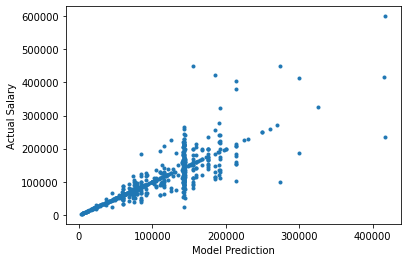

In [136]:
plt.xlabel('Model Prediction')
plt.ylabel('Actual Salary')
plt.plot(result_X, result_y, '.')
print(f'R^2 = {model.score(X, y)}')

**Some Interesting Things to Note**



*   The model seems to be fairly accurate for incomes in the range \$0-\$125,000
*   In some specific locations, the model seems unable to accurately predict the actual salary of the given case. These locations can be seen anywhere the points seem to form a vertical line. This proves that there are other factors which the data does not provide information for that affect salary. For example, something not in the dataset that could affect salary is the industry in which someone works.
*   It seems the predictions become less accurate as the salary increases which could be due to less data points for higher incomes
*   The model could likely be made more accurate by reducing the number of labels assigned to some values in the dataset. For example, there were a total of 50 company locations. However about 60% of the cases had a company location in the US. We can just label locations that appear less than a certain amount as the same 'other' label.

